# 1. Problem Definition

From dataset given, create a model using simple Artificial Neural Network

# 2. Data

Data is from: https://www.kaggle.com/datasets/rohitudageri/credit-card-details

# 3. Features

Data dictionary: 

* Gender: Gender information

* Car_owner: Having car or not

* Propert_owner: Having property or not

* Children: Count of children

* Annual_income: Annual income

* Type_Income: Income type

* Education: Education level

* Marital_status: Marital_status

* Housing_type: Living style

* Birthday_count: Use backward count from current day (0), -1 means yesterday.

* Employed_days: Start date of employment. Use backward count from current day (0). Positive value means, individual is currently unemployed.

* Mobile_phone: Any mobile phone

* Work_phone: Any work phone

* Phone: Any phone number

* EMAIL_ID: Any email ID

* Type_Occupation: Occupation

* Family_Members: Family size

* Another data set (Credit_card_label.csv) contains two key pieces of information

* ID: The joining key between application data and credit status data, same is Ind_ID

* Label: 0 is application approved and 1 is application rejected.



**NOTE**: in this data version the label column is copied into Credit_card.csv from Credit_card.csv

In [1]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#load data
df = pd.read_csv('Credit_card.csv')
df

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2,0


In [3]:
df.isna().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [4]:
df.dtypes

Ind_ID               int64
GENDER              object
Car_Owner           object
Propert_Owner       object
CHILDREN             int64
Annual_income      float64
Type_Income         object
EDUCATION           object
Marital_status      object
Housing_type        object
Birthday_count     float64
Employed_days        int64
Mobile_phone         int64
Work_Phone           int64
Phone                int64
EMAIL_ID             int64
Type_Occupation     object
Family_Members       int64
label                int64
dtype: object

### data cleaning

In [5]:
df.GENDER.value_counts()

F    973
M    568
Name: GENDER, dtype: int64

In [6]:
df['GENDER'].fillna('M',inplace=True)

In [7]:
df.GENDER.isna().sum()

0

In [8]:
df['Annual_income'].fillna(df['Annual_income'].mean(),inplace=True)

In [9]:
df.Annual_income.isna().sum()

0

In [10]:
round(df['Birthday_count'].mean(),0)

-16040.0

In [11]:
df['Birthday_count'].fillna(round(df['Birthday_count'].mean(),0),inplace=True)

In [12]:
df.Birthday_count.isna().sum()

0

In [13]:
df.Type_Occupation.fillna('missing',inplace=True)

In [14]:
df.Type_Occupation.isna().sum()

0

In [15]:
df.isna().sum()

Ind_ID             0
GENDER             0
Car_Owner          0
Propert_Owner      0
CHILDREN           0
Annual_income      0
Type_Income        0
EDUCATION          0
Marital_status     0
Housing_type       0
Birthday_count     0
Employed_days      0
Mobile_phone       0
Work_Phone         0
Phone              0
EMAIL_ID           0
Type_Occupation    0
Family_Members     0
label              0
dtype: int64

In [16]:
df.duplicated().sum()

0

## Exploratory data analysis

In [17]:
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.00000,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,missing,2,1
1,5009744,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,missing,2,1
2,5009746,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,-16040.0,-586,1,1,1,0,missing,2,1
3,5009749,F,Y,N,0,191399.32623,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,missing,2,1
4,5009752,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,missing,2,1


In [18]:
df.tail()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
1543,5028645,F,N,Y,0,191399.32623,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.00000,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.00000,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.00000,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2,0
1547,5053790,F,Y,Y,0,225000.00000,Working,Higher education,Married,House / apartment,-16601.0,-2859,1,0,0,0,missing,2,0


In [19]:
pd.crosstab(df.EDUCATION,df.label)

label,0,1
EDUCATION,,
Academic degree,2,0
Higher education,371,55
Incomplete higher,63,5
Lower secondary,15,6
Secondary / secondary special,922,109


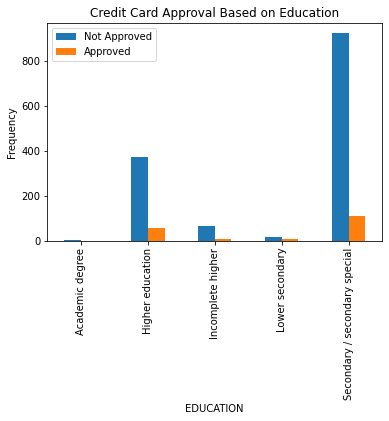

In [20]:
pd.crosstab(df.EDUCATION,df.label).plot(kind='bar')
plt.ylabel('Frequency')
plt.legend(['Not Approved','Approved']);
plt.title('Credit Card Approval Based on Education');

In [21]:
pd.crosstab(df.Type_Income,df.label)

label,0,1
Type_Income,,
Commercial associate,315,50
Pensioner,227,42
State servant,110,6
Working,721,77


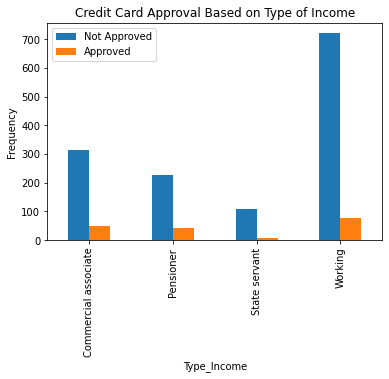

In [22]:
pd.crosstab(df.Type_Income,df.label).plot(kind='bar')
plt.ylabel('Frequency')
plt.legend(['Not Approved','Approved'])
plt.title('Credit Card Approval Based on Type of Income');

In [23]:
pd.crosstab(df.Propert_Owner,df.label)

label,0,1
Propert_Owner,,
N,473,65
Y,900,110


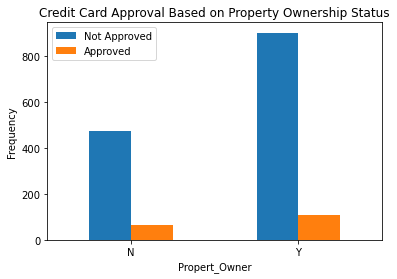

In [24]:
pd.crosstab(df.Propert_Owner,df.label).plot(kind='bar')
plt.ylabel('Frequency')
plt.legend(['Not Approved','Approved'])
plt.title('Credit Card Approval Based on Property Ownership Status');
plt.xticks(rotation=0);

In [25]:
473/65

7.276923076923077

In [26]:
900/110

8.181818181818182

### Income Distribution in this data set

Text(0.5, 1.0, 'Annual Income distribution')

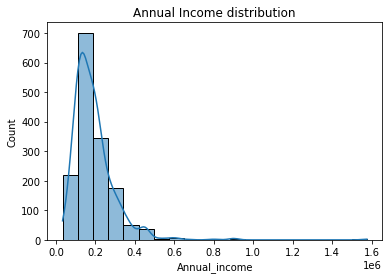

In [27]:
sns.histplot(df.Annual_income,bins=20,kde=True)
plt.title('Annual Income distribution')

### Number of Children Distribution

In [28]:
df.CHILDREN.value_counts()

0     1091
1      305
2      134
3       16
4        1
14       1
Name: CHILDREN, dtype: int64

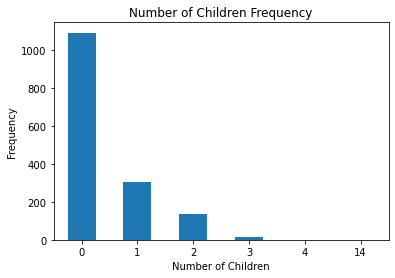

In [29]:
df.CHILDREN.value_counts().plot(kind='bar')
plt.xlabel('Number of Children');
plt.ylabel('Frequency')
plt.title('Number of Children Frequency')
plt.xticks(rotation=0);

## Correlation analysis

In this project , we will model our project with simple ANN

Since there is 'object' data type, we need to convert it using labelEncoder

In [30]:
for col in df.select_dtypes(include=['object']).columns:
    print(f'{col}: {df[col].unique()}')

GENDER: ['M' 'F']
Car_Owner: ['Y' 'N']
Propert_Owner: ['Y' 'N']
Type_Income: ['Pensioner' 'Commercial associate' 'Working' 'State servant']
EDUCATION: ['Higher education' 'Secondary / secondary special' 'Lower secondary'
 'Incomplete higher' 'Academic degree']
Marital_status: ['Married' 'Single / not married' 'Civil marriage' 'Separated' 'Widow']
Housing_type: ['House / apartment' 'With parents' 'Rented apartment'
 'Municipal apartment' 'Co-op apartment' 'Office apartment']
Type_Occupation: ['missing' 'Core staff' 'Cooking staff' 'Laborers' 'Sales staff'
 'Accountants' 'High skill tech staff' 'Managers' 'Cleaning staff'
 'Drivers' 'Low-skill Laborers' 'IT staff' 'Waiters/barmen staff'
 'Security staff' 'Medicine staff' 'Private service staff' 'HR staff'
 'Secretaries' 'Realty agents']


In [31]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])
    
    print(f'{col}: {df[col].unique()}')

GENDER: [1 0]
Car_Owner: [1 0]
Propert_Owner: [1 0]
Type_Income: [1 0 3 2]
EDUCATION: [1 4 3 2 0]
Marital_status: [1 3 0 2 4]
Housing_type: [1 5 4 2 0 3]
Type_Occupation: [18  3  2  8 14  0  6 10  1  4  9  7 17 16 11 12  5 15 13]


In [32]:
df = df.drop('Ind_ID',axis=1)

In [33]:
corr_matrix = df.corr().round(2)
corr_matrix

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
GENDER,1.00,0.37,-0.04,0.06,0.22,0.06,-0.04,-0.12,0.08,0.19,-0.18,NaN,0.04,-0.03,-0.02,-0.13,0.10,0.06
Car_Owner,0.37,1.00,0.00,0.06,0.21,0.03,-0.13,-0.14,-0.00,0.14,-0.15,NaN,0.03,0.03,0.04,-0.12,0.12,-0.01
Propert_Owner,-0.04,0.00,1.00,-0.00,0.04,-0.06,-0.02,0.00,-0.17,-0.12,0.10,NaN,-0.17,-0.08,0.06,0.04,-0.00,-0.02
CHILDREN,0.06,0.06,-0.00,1.00,0.08,0.06,-0.07,-0.16,0.00,0.28,-0.22,NaN,0.04,-0.00,0.03,-0.13,0.89,-0.02
Annual_income,0.22,0.21,0.04,0.08,1.00,-0.13,-0.24,0.00,0.01,0.11,-0.16,NaN,-0.07,-0.01,0.12,-0.09,0.05,0.03
Type_Income,0.06,0.03,-0.06,0.06,-0.13,1.00,0.10,-0.03,0.03,0.17,-0.31,NaN,0.15,0.01,-0.04,-0.24,0.07,-0.07
EDUCATION,-0.04,-0.13,-0.02,-0.07,-0.24,0.10,1.00,0.05,-0.04,-0.19,0.13,NaN,-0.01,-0.03,-0.13,0.05,-0.06,-0.03
Marital_status,-0.12,-0.14,0.00,-0.16,0.00,-0.03,0.05,1.00,-0.01,-0.12,0.18,NaN,-0.08,-0.00,-0.06,0.10,-0.54,0.06
Housing_type,0.08,-0.00,-0.17,0.00,0.01,0.03,-0.04,-0.01,1.00,0.22,-0.10,NaN,0.04,-0.04,0.02,-0.06,0.00,-0.00
Birthday_count,0.19,0.14,-0.12,0.28,0.11,0.17,-0.19,-0.12,0.22,1.00,-0.61,NaN,0.17,-0.03,0.17,-0.33,0.26,-0.04


<AxesSubplot:>

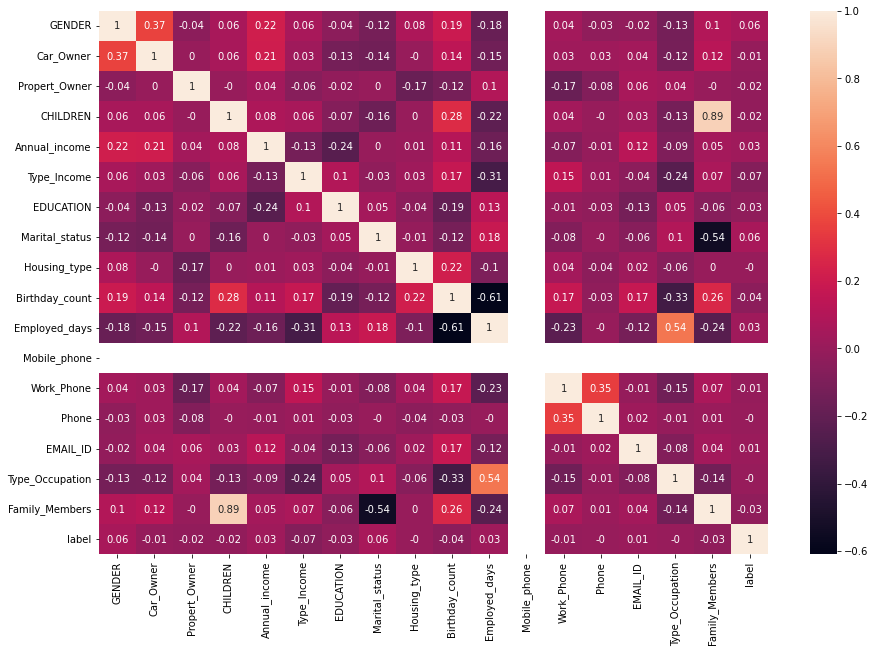

In [34]:
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix,annot=True)

# 4. Modelling

We need to shuffle our data as the data has been ordered to prevent order bias

In [35]:
df_shuffle = df.sample(frac=1)

In [36]:
df_shuffle

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
722,1,1,0,0,315000.00000,3,4,1,1,-16675.0,-5056,1,1,1,0,4,2,0
919,1,0,0,0,135000.00000,1,4,1,1,-16040.0,365243,1,0,1,0,18,2,0
189,1,1,1,0,256500.00000,0,1,1,1,-21503.0,-1674,1,0,0,1,3,2,0
1526,1,0,0,1,148500.00000,3,4,1,1,-13574.0,-109,1,0,0,0,8,3,0
379,0,0,1,0,283500.00000,3,4,1,1,-17958.0,-655,1,0,0,0,14,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011,0,0,0,0,191399.32623,3,1,2,1,-21887.0,-1526,1,0,0,0,3,1,0
143,1,0,0,0,162000.00000,1,4,1,1,-21244.0,365243,1,0,0,0,18,2,1
84,0,1,1,0,256500.00000,0,1,3,1,-11210.0,-1724,1,1,0,0,0,2,1
1082,0,0,1,0,360000.00000,2,1,1,1,-16182.0,-3163,1,0,1,0,10,2,0


Now we can split and continue the modelling 

In [37]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

In [38]:
df_shuffle.shape[1]

18

In [39]:
train = int(0.8*len(df_shuffle))
val = int(0.1*len(df_shuffle))
test = int(0.1*len(df_shuffle))


X_train = df_shuffle[:train].drop('label',axis=1)
X_val = df_shuffle[train:val+train+1].drop('label',axis=1)
X_test = df_shuffle[val+train+1:].drop('label',axis=1)


y_train = df_shuffle[:train]['label']
y_val = df_shuffle[train:val+train+1]['label']
y_test = df_shuffle[val+train+1:]['label']

In [40]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Set a seed for reproducibility
np.random.seed(42)

# Normalize your data if not already normalized
# Example: X_train_normalized = (X_train - X_train.mean()) / X_train.std()

# Define the model
model = keras.Sequential([
    Dense(128, input_shape=(17,), activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss',
                               patience=20,  # Adjust patience as needed
                               restore_best_weights=True)

model.fit(X_train, y_train,
          epochs=1000,
          batch_size=32,  # Experiment with batch size
          validation_data=(X_val, y_val),
          callbacks=[early_stopping])

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")


Epoch 1/1000
39/39 [==============================] - 1s 6ms/step - loss: 5780.2988 - accuracy: 0.7593 - val_loss: 2403.2981 - val_accuracy: 0.9161
Epoch 2/1000
39/39 [==============================] - 0s 2ms/step - loss: 3906.1248 - accuracy: 0.7811 - val_loss: 1571.7605 - val_accuracy: 0.9161
Epoch 3/1000
39/39 [==============================] - 0s 2ms/step - loss: 3110.4216 - accuracy: 0.7625 - val_loss: 1013.3017 - val_accuracy: 0.9161
Epoch 4/1000
39/39 [==============================] - 0s 3ms/step - loss: 2307.8127 - accuracy: 0.7892 - val_loss: 508.7871 - val_accuracy: 0.9161
Epoch 5/1000
39/39 [==============================] - 0s 2ms/step - loss: 1994.8617 - accuracy: 0.7706 - val_loss: 304.2071 - val_accuracy: 0.9161
Epoch 6/1000
39/39 [==============================] - 0s 2ms/step - loss: 1467.1180 - accuracy: 0.7536 - val_loss: 160.5296 - val_accuracy: 0.9161
Epoch 7/1000
39/39 [==============================] - 0s 2ms/step - loss: 1122.3710 - accuracy: 0.7997 - val_loss: 

Epoch 58/1000
39/39 [==============================] - 0s 2ms/step - loss: 3.4199 - accuracy: 0.8425 - val_loss: 0.3596 - val_accuracy: 0.9161
Epoch 59/1000
39/39 [==============================] - 0s 2ms/step - loss: 7.4463 - accuracy: 0.8473 - val_loss: 0.3560 - val_accuracy: 0.9161
Epoch 60/1000
39/39 [==============================] - 0s 2ms/step - loss: 3.0503 - accuracy: 0.8554 - val_loss: 0.3530 - val_accuracy: 0.9161
Epoch 61/1000
39/39 [==============================] - 0s 2ms/step - loss: 2.2380 - accuracy: 0.8546 - val_loss: 0.3499 - val_accuracy: 0.9161
Epoch 62/1000
39/39 [==============================] - 0s 2ms/step - loss: 5.1284 - accuracy: 0.8603 - val_loss: 0.3466 - val_accuracy: 0.9161
Epoch 63/1000
39/39 [==============================] - 0s 2ms/step - loss: 3.5833 - accuracy: 0.8627 - val_loss: 0.3439 - val_accuracy: 0.9161
Epoch 64/1000
39/39 [==============================] - 0s 2ms/step - loss: 5.1616 - accuracy: 0.8570 - val_loss: 0.3418 - val_accuracy: 0.9161

39/39 [==============================] - 0s 2ms/step - loss: 0.9879 - accuracy: 0.8708 - val_loss: 0.2987 - val_accuracy: 0.9161
Epoch 116/1000
39/39 [==============================] - 0s 2ms/step - loss: 1.9935 - accuracy: 0.8683 - val_loss: 0.2984 - val_accuracy: 0.9161
Epoch 117/1000
39/39 [==============================] - 0s 2ms/step - loss: 2.5033 - accuracy: 0.8732 - val_loss: 0.2981 - val_accuracy: 0.9161
Epoch 118/1000
39/39 [==============================] - 0s 2ms/step - loss: 0.4406 - accuracy: 0.8748 - val_loss: 0.2980 - val_accuracy: 0.9161
Epoch 119/1000
39/39 [==============================] - 0s 2ms/step - loss: 0.7957 - accuracy: 0.8748 - val_loss: 0.2980 - val_accuracy: 0.9161
Epoch 120/1000
39/39 [==============================] - 0s 2ms/step - loss: 0.7614 - accuracy: 0.8716 - val_loss: 0.2978 - val_accuracy: 0.9161
Epoch 121/1000
39/39 [==============================] - 0s 2ms/step - loss: 0.4506 - accuracy: 0.8756 - val_loss: 0.2978 - val_accuracy: 0.9161
Epoch 1

Epoch 172/1000
39/39 [==============================] - 0s 2ms/step - loss: 0.3954 - accuracy: 0.8764 - val_loss: 0.2963 - val_accuracy: 0.9161
Epoch 173/1000
39/39 [==============================] - 0s 2ms/step - loss: 0.3730 - accuracy: 0.8764 - val_loss: 0.2963 - val_accuracy: 0.9161
Epoch 174/1000
39/39 [==============================] - 0s 2ms/step - loss: 0.4813 - accuracy: 0.8756 - val_loss: 0.2963 - val_accuracy: 0.9161
Epoch 175/1000
39/39 [==============================] - 0s 2ms/step - loss: 0.6670 - accuracy: 0.8756 - val_loss: 0.2963 - val_accuracy: 0.9161
Epoch 176/1000
39/39 [==============================] - 0s 2ms/step - loss: 0.3972 - accuracy: 0.8764 - val_loss: 0.2964 - val_accuracy: 0.9161
Epoch 177/1000
39/39 [==============================] - 0s 2ms/step - loss: 0.4255 - accuracy: 0.8756 - val_loss: 0.2963 - val_accuracy: 0.9161
Epoch 178/1000
39/39 [==============================] - 0s 2ms/step - loss: 0.3752 - accuracy: 0.8756 - val_loss: 0.2962 - val_accuracy: